In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings('ignore')

In [2]:
market = pd.read_csv('/content/marketing_campaign_data_messy.csv')
market.head()

,Campaign_ID,Campaign_Name,Start_Date,End_Date,Channel,Impressions,Clicks,Spend,Conversions,Active,Clicks,Campaign_Tag
0,CMP-00001,Q4_Summer_CMP-00001,2023-11-24 00:00:00,2023-12-13,TikTok,16795,197,$102.82,20.0,Y,NaN,TI
1,CMP-00002,Q1_Launch_CMP-00002,2023-05-06 00:00:00,2023-05-12,Facebook,1860,30,24.33,1.0,0,NaN,FA
2,CMP-00003,Q3_Winter_CMP-00003,2023-12-13 00:00:00,2023-12-20,Email,77820,843,1323.39,51.0,No,NaN,EM
3,CMP-00004,Q1_BlackFriday_CMP-00004,2023-10-30,2023-11-03,TikTok,55886,2019,2180.38,135.0,True,NaN,TI
4,CMP-00005,Q2_Winter_CMP-00005,2023-04-22 00:00:00,2023-04-23,Facebook,7265,169,252.44,30.0,Yes,NaN,FA


In [3]:
market.columns = market.columns.str.strip()
market = market.drop(['Campaign_ID','Campaign_Name','Campaign_Tag'], axis=1, errors='ignore')
market.head()

,Start_Date,End_Date,Channel,Impressions,Clicks,Spend,Conversions,Active,Clicks
0,2023-11-24 00:00:00,2023-12-13,TikTok,16795,197,$102.82,20.0,Y,NaN
1,2023-05-06 00:00:00,2023-05-12,Facebook,1860,30,24.33,1.0,0,NaN
2,2023-12-13 00:00:00,2023-12-20,Email,77820,843,1323.39,51.0,No,NaN
3,2023-10-30,2023-11-03,TikTok,55886,2019,2180.38,135.0,True,NaN
4,2023-04-22 00:00:00,2023-04-23,Facebook,7265,169,252.44,30.0,Yes,NaN


In [4]:
market.isnull().sum()

,0
Start_Date,0
End_Date,0
Channel,101
Impressions,0
Clicks,0
Spend,0
Conversions,200
Active,0
Clicks,1980


In [5]:
market.dropna(inplace=True)

## Campaign Performance KPIs

In [6]:
print(market['Active'].unique())
print(market['Channel'].unique())

['0' '1' 'True' 'False' 'Y' 'No' 'Yes']
['Google Ads' 'E-mail' 'Email' 'Instagram' 'Facebook' 'TikTok' 'Tik_Tok'
 'Insta_gram']


In [7]:
market['Spend'] = market['Spend'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
market.head()

,Start_Date,End_Date,Channel,Impressions,Clicks,Spend,Conversions,Active,Clicks
22,2023-11-08 00:00:00,2023-11-24,Google Ads,86305,2637,4726.22,216.0,0,86385.0
43,2023-05-15 00:00:00,2023-06-01,E-mail,81038,2149,3729.91,116.0,1,81075.0
63,2023-01-17,2023-02-03,Email,78189,2164,1734.66,187.0,True,78213.0
143,2023-12-10 00:00:00,2024-01-04,Google Ads,24419,350,188.11,29.0,False,24436.0
200,2023-01-11 00:00:00,2023-01-06,Instagram,69840,2185,1467.55,272.0,Y,69935.0


In [8]:
market = market.loc[:,~market.columns.duplicated()]
market['CTR'] = market['Clicks'] / market['Impressions']
market['CPC'] = market['Spend'] / market['Clicks']
market['CPA'] = market['Spend'] / market['Conversions']
market['ConversionRate'] = market['Conversions'] / market['Clicks']
market.head()

,Start_Date,End_Date,Channel,Impressions,Clicks,Spend,Conversions,Active,CTR,CPC,CPA,ConversionRate
22,2023-11-08 00:00:00,2023-11-24,Google Ads,86305,2637,4726.22,216.0,0,0.030554,1.792272,21.880648,0.081911
43,2023-05-15 00:00:00,2023-06-01,E-mail,81038,2149,3729.91,116.0,1,0.026518,1.735649,32.154397,0.053979
63,2023-01-17,2023-02-03,Email,78189,2164,1734.66,187.0,True,0.027677,0.801599,9.276257,0.086414
143,2023-12-10 00:00:00,2024-01-04,Google Ads,24419,350,188.11,29.0,False,0.014333,0.537457,6.486552,0.082857
200,2023-01-11 00:00:00,2023-01-06,Instagram,69840,2185,1467.55,272.0,Y,0.031286,0.671648,5.395404,0.124485


In [9]:
market = market.drop(['Clicks', 'Spend', 'Impressions', 'Conversions'], axis=1)
market.head()

,Start_Date,End_Date,Channel,Active,CTR,CPC,CPA,ConversionRate
22,2023-11-08 00:00:00,2023-11-24,Google Ads,0,0.030554,1.792272,21.880648,0.081911
43,2023-05-15 00:00:00,2023-06-01,E-mail,1,0.026518,1.735649,32.154397,0.053979
63,2023-01-17,2023-02-03,Email,True,0.027677,0.801599,9.276257,0.086414
143,2023-12-10 00:00:00,2024-01-04,Google Ads,False,0.014333,0.537457,6.486552,0.082857
200,2023-01-11 00:00:00,2023-01-06,Instagram,Y,0.031286,0.671648,5.395404,0.124485


## Channel Performance Analysis

In [10]:
def active_numerical(x):
  if x in ['Yes', 'Y', 'True', '1']:
    return 1
  else:
    return 0

market['Active'] = market['Active'].apply(active_numerical)
market.head()

,Start_Date,End_Date,Channel,Active,CTR,CPC,CPA,ConversionRate
22,2023-11-08 00:00:00,2023-11-24,Google Ads,0,0.030554,1.792272,21.880648,0.081911
43,2023-05-15 00:00:00,2023-06-01,E-mail,1,0.026518,1.735649,32.154397,0.053979
63,2023-01-17,2023-02-03,Email,1,0.027677,0.801599,9.276257,0.086414
143,2023-12-10 00:00:00,2024-01-04,Google Ads,0,0.014333,0.537457,6.486552,0.082857
200,2023-01-11 00:00:00,2023-01-06,Instagram,1,0.031286,0.671648,5.395404,0.124485


In [11]:
market['Start_Date'] = pd.to_datetime(market['Start_Date'], format='mixed')
market['End_Date'] = pd.to_datetime(market['End_Date'], format='mixed')
market.head()

,Start_Date,End_Date,Channel,Active,CTR,CPC,CPA,ConversionRate
22,2023-11-08,2023-11-24,Google Ads,0,0.030554,1.792272,21.880648,0.081911
43,2023-05-15,2023-06-01,E-mail,1,0.026518,1.735649,32.154397,0.053979
63,2023-01-17,2023-02-03,Email,1,0.027677,0.801599,9.276257,0.086414
143,2023-12-10,2024-01-04,Google Ads,0,0.014333,0.537457,6.486552,0.082857
200,2023-01-11,2023-01-06,Instagram,1,0.031286,0.671648,5.395404,0.124485


In [12]:
print(market['Channel'].unique())

['Google Ads' 'E-mail' 'Email' 'Instagram' 'Facebook' 'TikTok' 'Tik_Tok'
 'Insta_gram']


In [13]:
channel_replacements = {
    'Facebok': 'Facebook',
    'Tik_Tok': 'TikTok',
    'Gogle': 'Google Ads',
    'E-mail': 'Email',
    'Insta_gram': 'Instagram'
}

market['Channel'] = market['Channel'].replace(channel_replacements)
print(market['Channel'].unique())

['Google Ads' 'Email' 'Instagram' 'Facebook' 'TikTok']


In [14]:
market_ctr = market.groupby('Channel')['CTR'].mean().reset_index()
market_ctr

,Channel,CTR
0,Email,0.029943
1,Facebook,0.028090
2,Google Ads,0.026628
3,Instagram,0.024840
4,TikTok,0.031658


In [15]:
market_cpa = market.groupby('Channel')['CPA'].mean().reset_index()
market_cpa

,Channel,CPA
0,Email,13.964678
1,Facebook,11.429119
2,Google Ads,11.454378
3,Instagram,6.773395
4,TikTok,14.792228


In [16]:
market_conversion = market.groupby('Channel')['ConversionRate'].mean().reset_index()
market_conversion

,Channel,ConversionRate
0,Email,0.090371
1,Facebook,0.128902
2,Google Ads,0.114818
3,Instagram,0.126628
4,TikTok,0.102006


In [17]:
market_cpc = market.groupby('Channel')['CPC'].mean().reset_index()
market_cpc

,Channel,CPC
0,Email,1.144437
1,Facebook,1.321203
2,Google Ads,1.273531
3,Instagram,0.855259
4,TikTok,1.364738


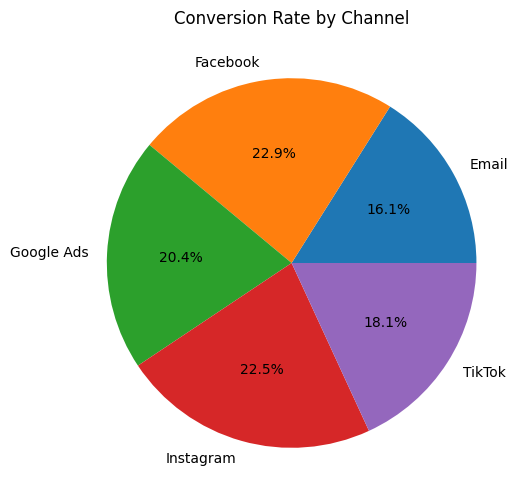

In [18]:
plt.figure(figsize=(10, 6))
plt.pie(market_conversion['ConversionRate'], labels=market_conversion['Channel'], autopct='%1.1f%%')
plt.title('Conversion Rate by Channel')
plt.show()

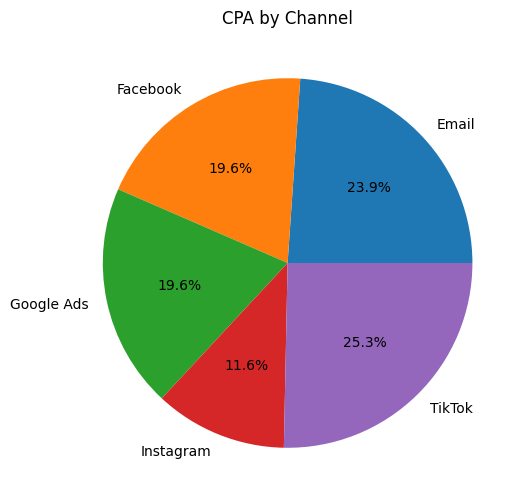

In [19]:
plt.figure(figsize=(10, 6))
plt.pie(market_cpa['CPA'], labels=market_cpa['Channel'], autopct='%1.1f%%')
plt.title('CPA by Channel')
plt.show()

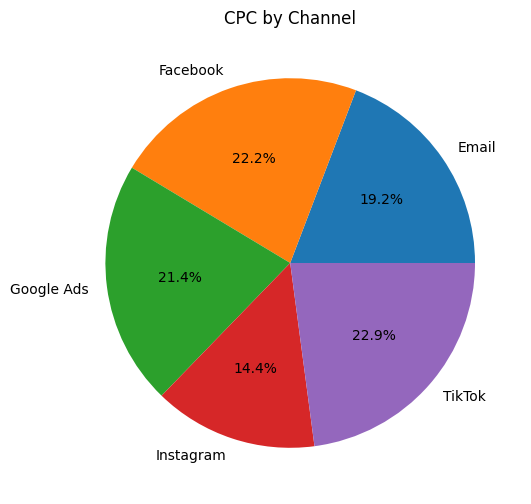

In [20]:
plt.figure(figsize=(10, 6))
plt.pie(market_cpc['CPC'], labels=market_cpc['Channel'], autopct='%1.1f%%')
plt.title('CPC by Channel')
plt.show()

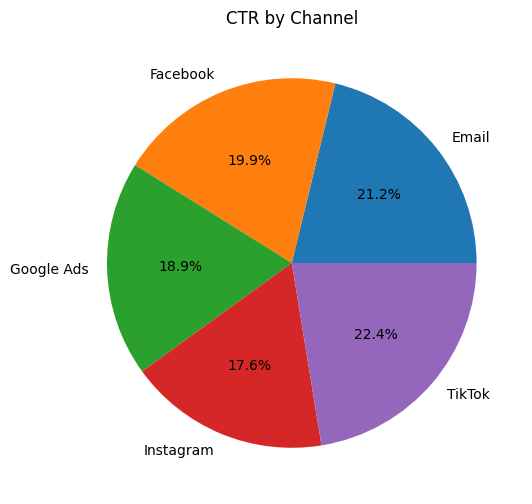

In [21]:
plt.figure(figsize=(10, 6))
plt.pie(market_ctr['CTR'], labels=market_ctr['Channel'], autopct='%1.1f%%')
plt.title('CTR by Channel')
plt.show()

## Time-Based Analysis

<Figure size 1500x1000 with 0 Axes>

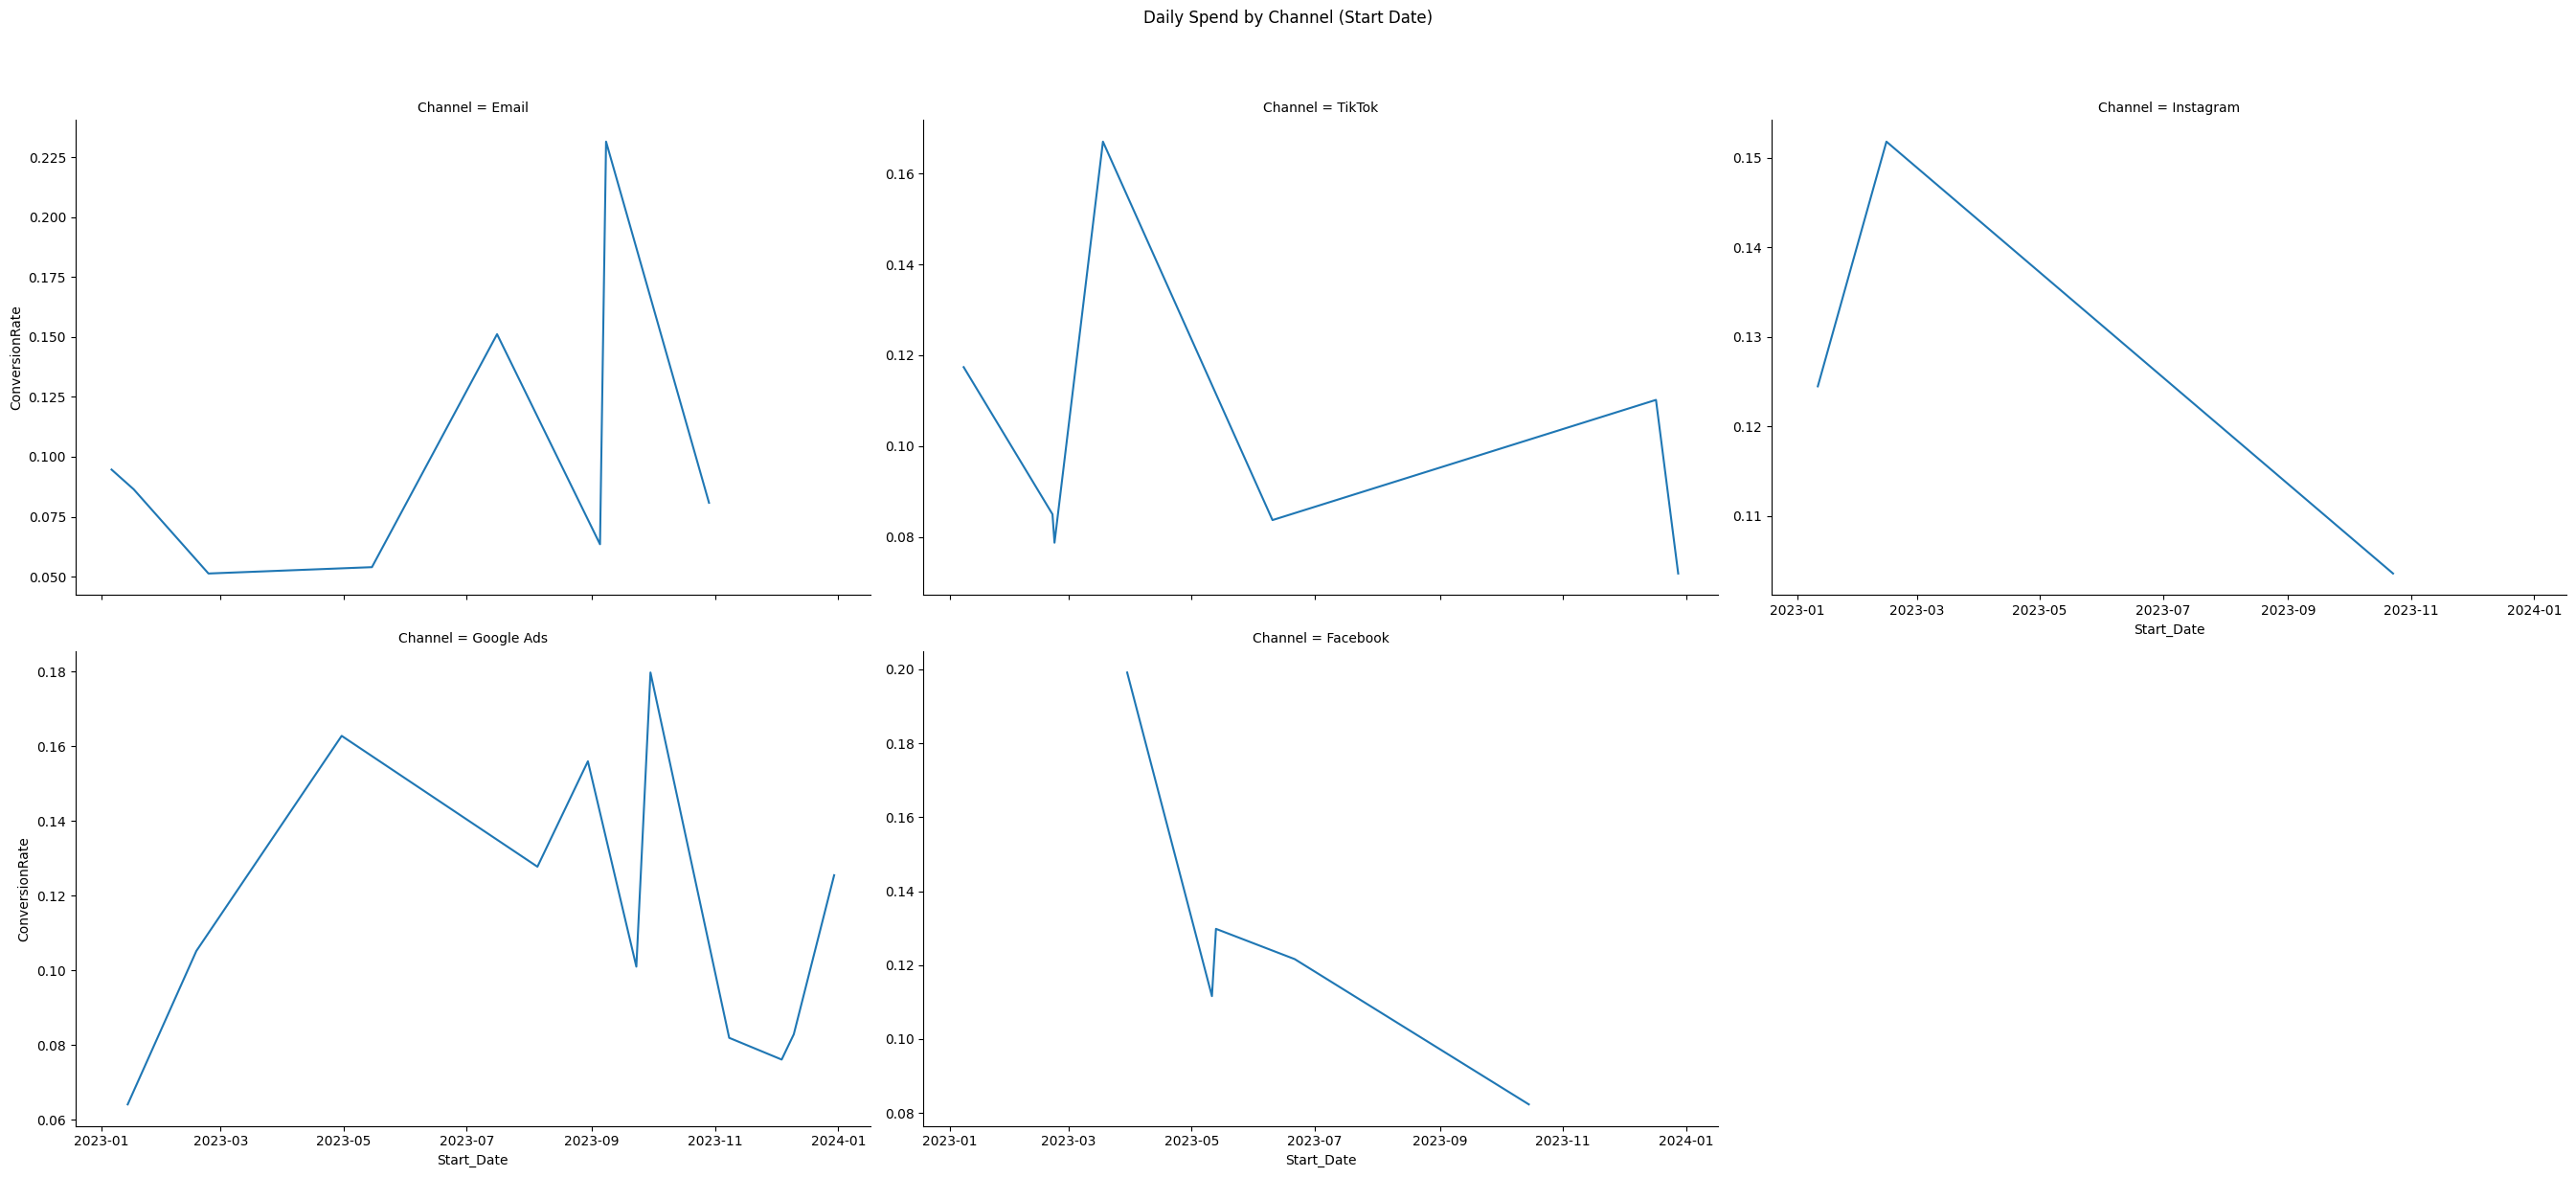

In [22]:
daily_channel_converstionrate = market.groupby(['Start_Date', 'Channel'])['ConversionRate'].sum().reset_index()

plt.figure(figsize=(15, 10))
sns.relplot(
    data=daily_channel_converstionrate,
    x='Start_Date',
    y='ConversionRate',
    col='Channel',
    kind='line',
    col_wrap=3,
    height=6,
    aspect=1.5,
    facet_kws={'sharey': False, 'sharex': True}
)

plt.suptitle('Daily Spend by Channel (Start Date)', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [23]:
market = market.drop(['Start_Date', 'End_Date'], axis=1)
market.head()

,Channel,Active,CTR,CPC,CPA,ConversionRate
22,Google Ads,0,0.030554,1.792272,21.880648,0.081911
43,Email,1,0.026518,1.735649,32.154397,0.053979
63,Email,1,0.027677,0.801599,9.276257,0.086414
143,Google Ads,0,0.014333,0.537457,6.486552,0.082857
200,Instagram,1,0.031286,0.671648,5.395404,0.124485


In [24]:
for col in market:
    if market[col].dtype == 'O':
        codes, _ = pd.factorize(market[col])
        market[col] = codes + 1

## Correlation Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

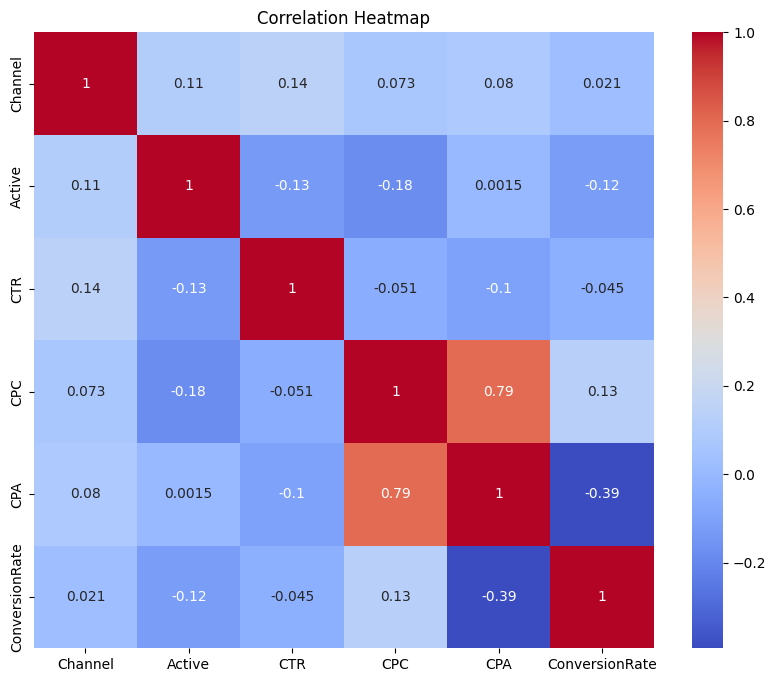

In [25]:
market_corr = market.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(market_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

## Hypothesis Testing

In [26]:
X_bp = market.drop('ConversionRate', axis=1)
X_bp = sm.add_constant(X_bp)
chi2, p, _, _ = sms.het_breuschpagan(market['ConversionRate'], X_bp)
print('p-value:', p)
print('Chi-Squared Test:', chi2)
print('Breusch-Pagan test for heteroskedasticity:', 'significant' if p > 0.05 else 'not significant')

p-value: 0.0006369336852355241
Chi-Squared Test: 21.55174994177527
Breusch-Pagan test for heteroskedasticity: not significant


## Linear Regression

In [50]:
X = market.drop('ConversionRate', axis=1)
y = market['ConversionRate']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [52]:
marketlin = LinearRegression()
marketlin.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = marketlin.predict(X_test)

In [54]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 0.000287915641551909
R-squared: 0.8214355530072264


## Decision Tree Regressor

In [58]:
marketdec = DecisionTreeRegressor(max_depth = 3)
marketdec.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [59]:
y_pred = marketdec.predict(X_test)

In [60]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 0.0006009119443530569
R-squared: 0.6273161525494604


## Random Forest Regressor

In [70]:
marketrand = RandomForestRegressor(n_estimators = 200, max_depth = 7)
marketrand.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=200)

In [71]:
y_pred = marketrand.predict(X_test)

In [72]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 0.000796492076044974
R-squared: 0.5060179213380639


## Adaboost Regressor

In [88]:
market_ada = AdaBoostRegressor(n_estimators = 280, learning_rate = 0.01)
market_ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=280)

In [89]:
y_pred = market_ada.predict(X_test)

In [90]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 0.000724907714493772
R-squared: 0.5504143350404316


## Gradient Boosting Regressor

In [91]:
market_gradient = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.29)
market_gradient.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.29, n_estimators=250)

In [92]:
y_pred = market_gradient.predict(X_test)

In [93]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 0.0004978152035806231
R-squared: 0.6912564525746949


## Extra Tree Regressor

In [97]:
market_extra = ExtraTreesRegressor(n_estimators = 350, max_depth = 8, n_jobs=10)
market_extra.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=8, n_estimators=350, n_jobs=10)

In [98]:
y_pred = market_extra.predict(X_test)

In [99]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 0.0005992871382907812
R-squared: 0.6283238525633148


## Voting Regressor

In [100]:
market_vote = VotingRegressor(estimators = [('lr', marketlin), ('dt', marketdec), ('rf', marketrand), ('ada', market_ada), ('gb', market_gradient), ('et', market_extra)], n_jobs=10)
market_vote.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor(max_depth=3)),
                            ('rf',
                             RandomForestRegressor(max_depth=7,
                                                   n_estimators=200)),
                            ('ada',
                             AdaBoostRegressor(learning_rate=0.01,
                                               n_estimators=280)),
                            ('gb',
                             GradientBoostingRegressor(learning_rate=0.29,
                                                       n_estimators=250)),
                            ('et',
                             ExtraTreesRegressor(max_depth=8, n_estimators=350,
                                                 n_jobs=10))],
                n_jobs=10)

In [101]:
y_pred = market_vote.predict(X_test)

In [102]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 0.000394695923951209
R-squared: 0.7552107311337488
